In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from datetime import datetime as dt
from dateutil.relativedelta import relativedelta

import quandl
API_key_quandl = 'M6KuKMhwUZNBVECkLswK'
quandl.ApiConfig.api_key = API_key_quandl

from openbb_terminal.sdk import openbb, TerminalStyle
from openbb_terminal import config_terminal as cfg
theme = TerminalStyle("dark", "dark", "dark")
## 가이드 문서 https://docs.openbb.co/sdk/usage/intros


# 시각화 도구
import plotly_express as px
import plotly.figure_factory as ff
import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='space')
import plotly.graph_objects as go

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (5,3)

## Data

In [2]:
div_yield = quandl.get('MULTPL/SP500_DIV_YIELD_MONTH', collapse = 'monthly')
sp_pe = quandl.get('MULTPL/SP500_PE_RATIO_MONTH', collapse = 'monthly')
shiller_pe = quandl.get('MULTPL/SHILLER_PE_RATIO_MONTH', collapse = 'monthly')
earning_yield = quandl.get('MULTPL/SP500_EARNINGS_YIELD_MONTH', collapse = 'monthly')
sp500_inf_adj = quandl.get('MULTPL/SP500_INFLADJ_MONTH', collapse = 'monthly')
sp500 = quandl.get('MULTPL/SP500_REAL_PRICE_MONTH', collapse = 'monthly')

div_yield.rename(columns={'Value':'Div yield'}, inplace = True)
earning_yield.rename(columns={'Value':'Earning yield'}, inplace = True)
sp_pe.rename(columns={'Value':'PE(SP)'}, inplace = True)
shiller_pe.rename(columns={'Value':'PE(Siller)'}, inplace = True)
sp500_inf_adj.rename(columns = {'Value': 'SP(Inflation-Adjusted)'}, inplace = True)
sp500.rename(columns = {'Value': 'SP'}, inplace = True)

sp500_df = sp500.join(sp500_inf_adj)
pe_df = shiller_pe.join(sp_pe)
yield_df = earning_yield.join(div_yield)

dataset = sp500_df.join([pe_df, yield_df])
rets = dataset.pct_change().dropna()
std, variance = openbb.qa.spread(data = rets['SP(Inflation-Adjusted)'], window = 3)
dataset = dataset.join([std, variance])
dataset = dataset.dropna()
dataset.rename_axis('date', inplace = True)

## Case study

Index변동: -25.29%
PE변동: -43.45%


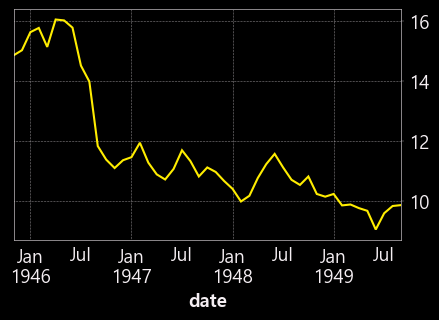

In [3]:
## 2차 세계대전
temp = dataset['1945-11-01':'1949-10-28']
temp['PE(Siller)'].plot()
## temp['SP'].plot()
print(f"Index변동: {((temp['SP'].min()/temp['SP'].max())-1)*1e2:.2f}%")
print(f"PE변동: {((temp['PE(Siller)'].min()/temp['PE(Siller)'].max())-1)*1e2:.2f}%")

Index변동: -15.78%
PE변동: -14.37%


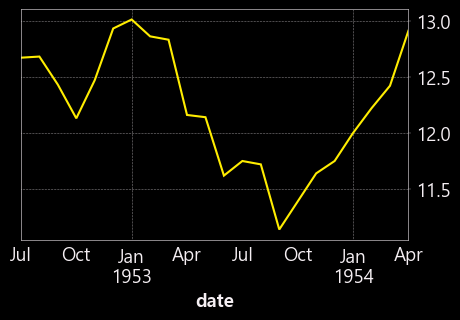

In [4]:
## 한국전
temp = dataset['1952-07-01':'1954-05-28']
temp['PE(Siller)'].plot()
## temp['SP'].plot()
print(f"Index변동: {((temp['SP'].min()/temp['SP'].max())-1)*1e2:.2f}%")
print(f"PE변동: {((temp['PE(Siller)'].min()/temp['PE(Siller)'].max())-1)*1e2:.2f}%")

Index변동: -17.32%
PE변동: -29.43%


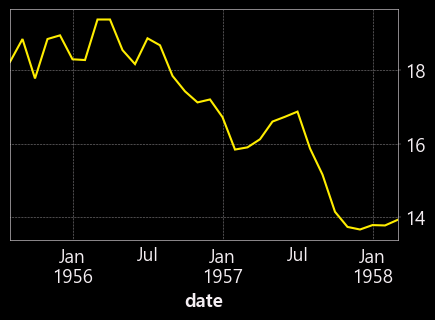

In [5]:
## 아이젠하워
temp = dataset['1955-08-01':'1958-04-28']
temp['PE(Siller)'].plot()
## temp['SP'].plot()
print(f"Index변동: {((temp['SP'].min()/temp['SP'].max())-1)*1e2:.2f}%")
print(f"PE변동: {((temp['PE(Siller)'].min()/temp['PE(Siller)'].max())-1)*1e2:.2f}%")

Index변동: -10.06%
PE변동: -12.99%


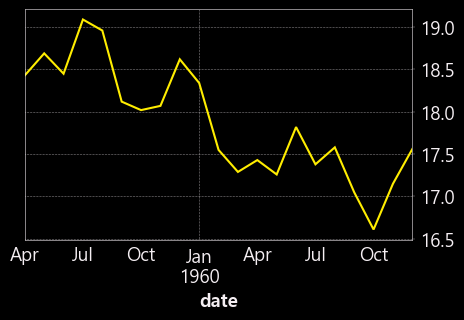

In [6]:
## 연착륙
temp = dataset['1959-04-01':'1961-01-28']
temp['PE(Siller)'].plot()
## temp['SP'].plot()
print(f"Index변동: {((temp['SP'].min()/temp['SP'].max())-1)*1e2:.2f}%")
print(f"PE변동: {((temp['PE(Siller)'].min()/temp['PE(Siller)'].max())-1)*1e2:.2f}%")

Index변동: -29.02%
PE변동: -42.93%


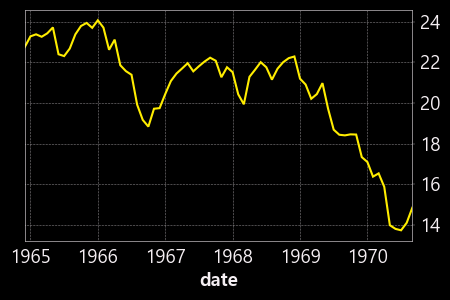

In [7]:
## 달러쇼크
temp = dataset['1964-12-01':'1970-10-29']
temp['PE(Siller)'].plot()
## temp['SP'].plot()
print(f"Index변동: {((temp['SP'].min()/temp['SP'].max())-1)*1e2:.2f}%")
print(f"PE변동: {((temp['PE(Siller)'].min()/temp['PE(Siller)'].max())-1)*1e2:.2f}%")

Index변동: -43.35%
PE변동: -55.69%


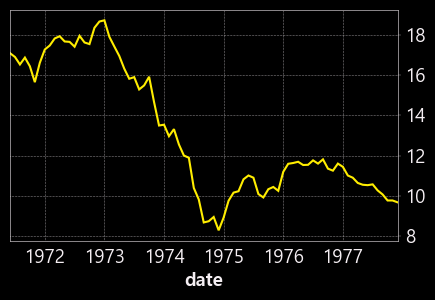

In [8]:
## 1차오일쇼크
temp = dataset["1971-06-01":"1977"]
temp['PE(Siller)'].plot()
## temp['SP'].plot()
print(f"Index변동: {((temp['SP'].min()/temp['SP'].max())-1)*1e2:.2f}%")
print(f"PE변동: {((temp['PE(Siller)'].min()/temp['PE(Siller)'].max())-1)*1e2:.2f}%")

Index변동: -46.62%
PE변동: -43.78%


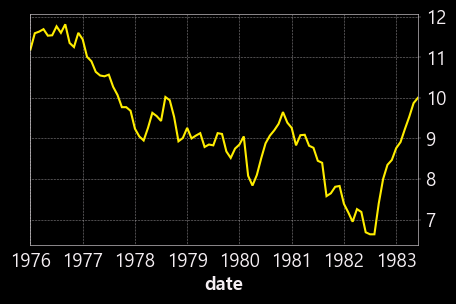

In [9]:
## 2차오일쇼크 ##물가충격
temp = dataset['1976-01-02':'1983-07-02']
temp['PE(Siller)'].plot()
## temp['SP'].plot()
print(f"Index변동: {((temp['SP'].min()/temp['SP'].max())-1)*1e2:.2f}%")
print(f"PE변동: {((temp['PE(Siller)'].min()/temp['PE(Siller)'].max())-1)*1e2:.2f}%")

Index변동: -15.22%
PE변동: -16.84%


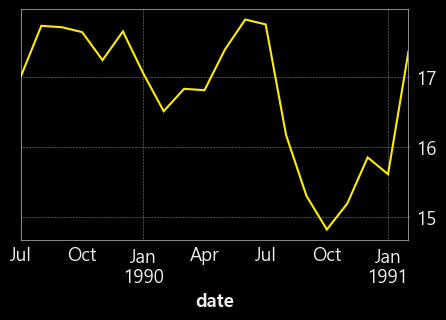

In [10]:
## 걸프전
temp = dataset['1989-07-05':'1991-03-01']
temp['PE(Siller)'].plot()
## temp['SP'].plot()
print(f"Index변동: {((temp['SP'].min()/temp['SP'].max())-1)*1e2:.2f}%")
print(f"PE변동: {((temp['PE(Siller)'].min()/temp['PE(Siller)'].max())-1)*1e2:.2f}%")

<Axes: xlabel='date'>

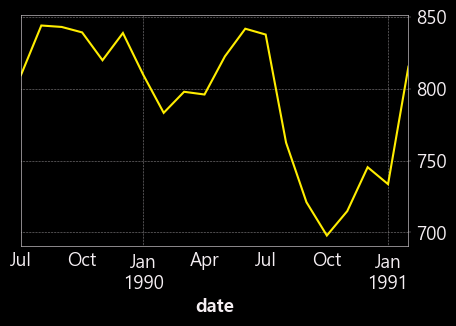

In [11]:
temp['SP(Inflation-Adjusted)'].plot()

Index변동: -43.65%
PE변동: -52.00%


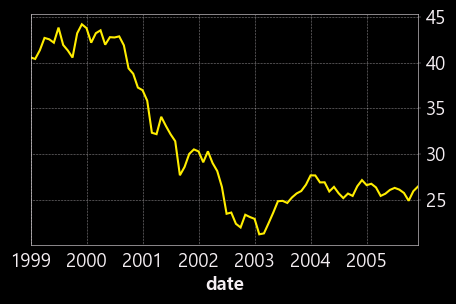

In [12]:
## 닷컴버블
temp = dataset["1999":"2005"]
temp['PE(Siller)'].plot()
## temp['SP'].plot()
print(f"Index변동: {((temp['SP'].min()/temp['SP'].max())-1)*1e2:.2f}%")
print(f"PE변동: {((temp['PE(Siller)'].min()/temp['PE(Siller)'].max())-1)*1e2:.2f}%")

Index변동: -50.82%
PE변동: -51.65%


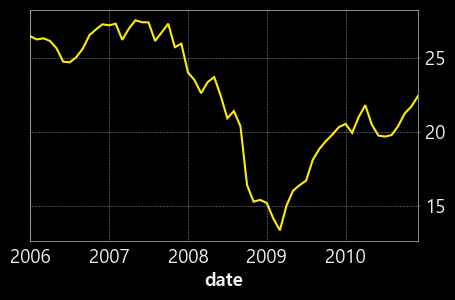

In [13]:
## 금융위기
temp = dataset["2006":"2010"]
temp['PE(Siller)'].plot()
## temp['SP'].plot()
print(f"Index변동: {((temp['SP'].min()/temp['SP'].max())-1)*1e2:.2f}%")
print(f"PE변동: {((temp['PE(Siller)'].min()/temp['PE(Siller)'].max())-1)*1e2:.2f}%")

Index변동: -20.00%
PE변동: -21.21%


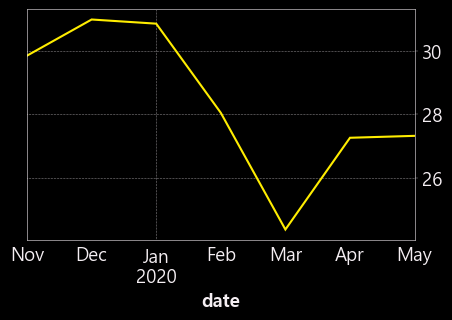

In [14]:
## 코로나
temp = dataset['2019-11-30':'2020-06-03']
temp['PE(Siller)'].plot()
## temp['SP'].plot()
print(f"Index변동: {((temp['SP'].min()/temp['SP'].max())-1)*1e2:.2f}%")
print(f"PE변동: {((temp['PE(Siller)'].min()/temp['PE(Siller)'].max())-1)*1e2:.2f}%")

Index변동: -34.95%
PE변동: -32.87%


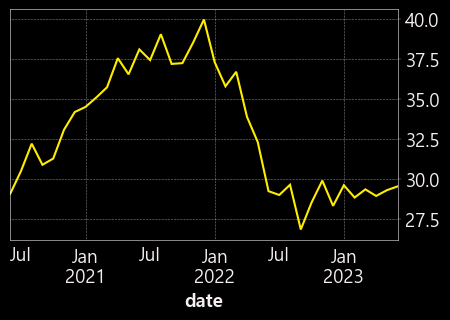

In [18]:
## 현재
temp = dataset["2020-06-01":]
temp['PE(Siller)'].plot()
## temp['SP'].plot()
print(f"Index변동: {((temp['SP'].min()/temp['SP'].max())-1)*1e2:.2f}%")
print(f"PE변동: {((temp['PE(Siller)'].min()/temp['PE(Siller)'].max())-1)*1e2:.2f}%")

In [20]:
openbb.qa.rolling_chart(dataset, target = 'PE(Siller)', window = 60, symbol = '')

In [21]:
openbb.qa.unitroot(rets['PE(Siller)'])

,ADF,KPSS
Test Statistic,-1.073581e+01,0.340612
P-Value,2.901079e-19,0.1
NLags,2.000000e+01,2
Nobs,1.807000e+03,
ICBest,-6.514490e+03,
